In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.prompt { min-width:4ex !important; }</style>"))
display(HTML("<style>div#notebook { font-size:14px !important; }</style>"))
pd.options.display.max_rows = 100
pd.options.display.max_columns = None
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
import sklearn


from scipy.sparse import hstack

def clear_dataframe(X_tr):

    ti = X_tr['date'].drop_duplicates().tolist()
    X_tr = X_tr.drop_duplicates(subset = ['date'])

    x_tr = X_tr.drop(['text_clear'], axis = 1).merge(f_[['date', 'text_clear']].groupby(['date']).agg(lambda x: ''.join(set(x))).reset_index(),
                                on = ['date'])
    return X_tr
    

In [147]:
f = pd.read_csv('texts/data.csv')
f['text_clear'] = f['text_clear'].fillna(u'')
g = pd.read_excel('data/market_data.xlsx').fillna(0)

def datetostr(x):
    try:
        return int(x.replace('/','').replace('-',''))
    except:
        return None
    

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [148]:
f_ = f[f['source'] == 'expert']
f.drop(f_.index, axis = 0, inplace = True)
f_.step = f_.step.str[6:] + '-' + f_.step.str[3:5] + '-' + f_.step.str[:2]
f = f.append(f_)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [149]:


f['date'] = f['step'].apply(datetostr)

f = f.merge(g, on = ['date'])


col = [u'SBER_r_1',u'ROSN_r_1',u'MGNT_r_1',u'LKOH_r_1',u'GAZP_r_1']




col_ = [u'SBER_return_1', u'SBER_return_10',
       u'SBER_return_30', u'SBER_return_50', u'SBER_return_b_1', u'SBER_return_b_10',
       u'SBER_return_b_30', u'SBER_return_b_50', u'LKOH_return_1', u'LKOH_return_10', u'LKOH_return_30',
       u'LKOH_return_50', u'LKOH_return_b_1', u'LKOH_return_b_10', u'LKOH_return_b_30',
       u'LKOH_return_b_50', u'GAZP_return_1', u'GAZP_return_10', u'GAZP_return_30', u'GAZP_return_50',
       u'GAZP_return_b_1', u'GAZP_return_b_10', u'GAZP_return_b_30', u'GAZP_return_b_50',
       u'MGNT_return_1', u'MGNT_return_10', u'MGNT_return_30', u'MGNT_return_50', u'MGNT_return_b_1',
       u'MGNT_return_b_10', u'MGNT_return_b_30', u'MGNT_return_b_50']


d_ = {
      'SBER' : [
                [u'сбербанк'], 
                [u'сбербанк', u'банк'],
                [u'сбербанк', u'банк', u'финанс'],
                [u'сбербанк', u'банк', u'финанс', u'экономик'],
                []
               ],
                
      'GAZP' : [
                [u'газпром'],
                [u'газпром', u'газ'],
                [u'газпром', u'газ', u'экономик'],
                [],      
               ], 
      
      'MGNT' : [
                [u'магнит'],
                [],      
               ], 
      
      'LKOH' : [
                [u'лукойл'],
                [u'лукойл', u'нефт'],
                [u'лукойл', u'нефт'],
                [u'лукойл', u'нефт', u'эконом'],
                [],      
               ],
    
      'ROSN' : [
                [u'роснефт'],
                [],      
               ]
      }


def find(x):
    if len(d) == 0: return True
    else:    
        for y in d:
            if x.lower().find(y) != -1: return True
        return False

    
#f = f[f['date'] // 100 >= 201611]
f['week'] = f['date']// 7

# H1: объем

In [27]:
d = pd.read_csv('data/'+'GAZP'+'.csv', sep = ';')

In [36]:
d = d_[col[0][0:4]][0]

f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
#f_ = f[f['b']].reset_index(drop = False)
f_ = f.reset_index(drop = False)
f_ = f_.dropna(subset = [c])

In [38]:
f_.groupby(['date',c[0:4] + '_vol']).sum()['b'].reset_index()

,date,GAZP_vol,b
0,20150105.0,18208740,0
1,20150106.0,25270920,0
2,20150108.0,32544100,0
3,20150109.0,29501280,0
4,20150112.0,25286750,5
5,20150113.0,32912570,7
6,20150114.0,37809840,13
7,20150115.0,32827500,13
8,20150116.0,32654610,6
9,20150119.0,53463970,10


In [29]:
f_ = f_.groupby(['b', 'week',c[0:4] + '_vol'])['index'].count().reset_index()

SBER_r_1 (0.8709637577783871, 2.6685688881562214e-18)
ROSN_r_1 (0.6776744954113645, 1.6755511613206744e-07)
MGNT_r_1 (0.8041564424672297, 0.0005264487437386252)
LKOH_r_1 (0.5213328331017356, 0.007529462121239061)
GAZP_r_1 (0.8146234851120988, 2.0240381861914523e-13)


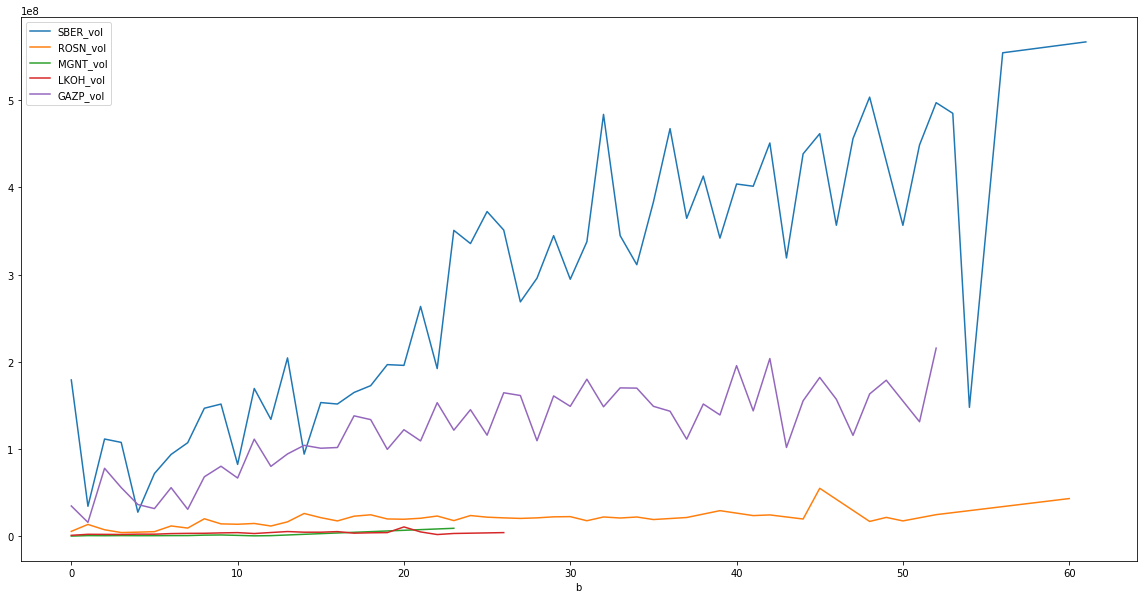

In [45]:
# только текст
res = pd.DataFrame()

for c in col:
    #c = col[4]

    #for d in d_[c[0:4]][0]:
    d = d_[c[0:4]][0]


    f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['week',c[0:4] + '_vol']).sum()['b'].reset_index()
    f_ = f_.groupby(['week']).sum().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    (f_.groupby(['b']).mean()[c[0:4] + '_vol']).plot(figsize = (20,10), legend = True
                                                                                    
                                                                                     )
    t = f_.groupby(['b']).mean().reset_index()
    print(c, scipy.stats.pearsonr(t['b'], t[c[0:4] + '_vol']))



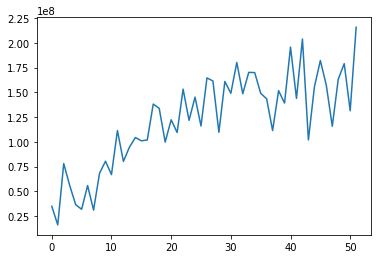

In [52]:
t['GAZP_vol'].plot()

In [142]:


dict_labels = {'GAZP':'Газпром', "LKOH":"Лукойл", "MGNT":"Магнит", "ROSN":"Роснефть", "SBER":"Сбербанк"}


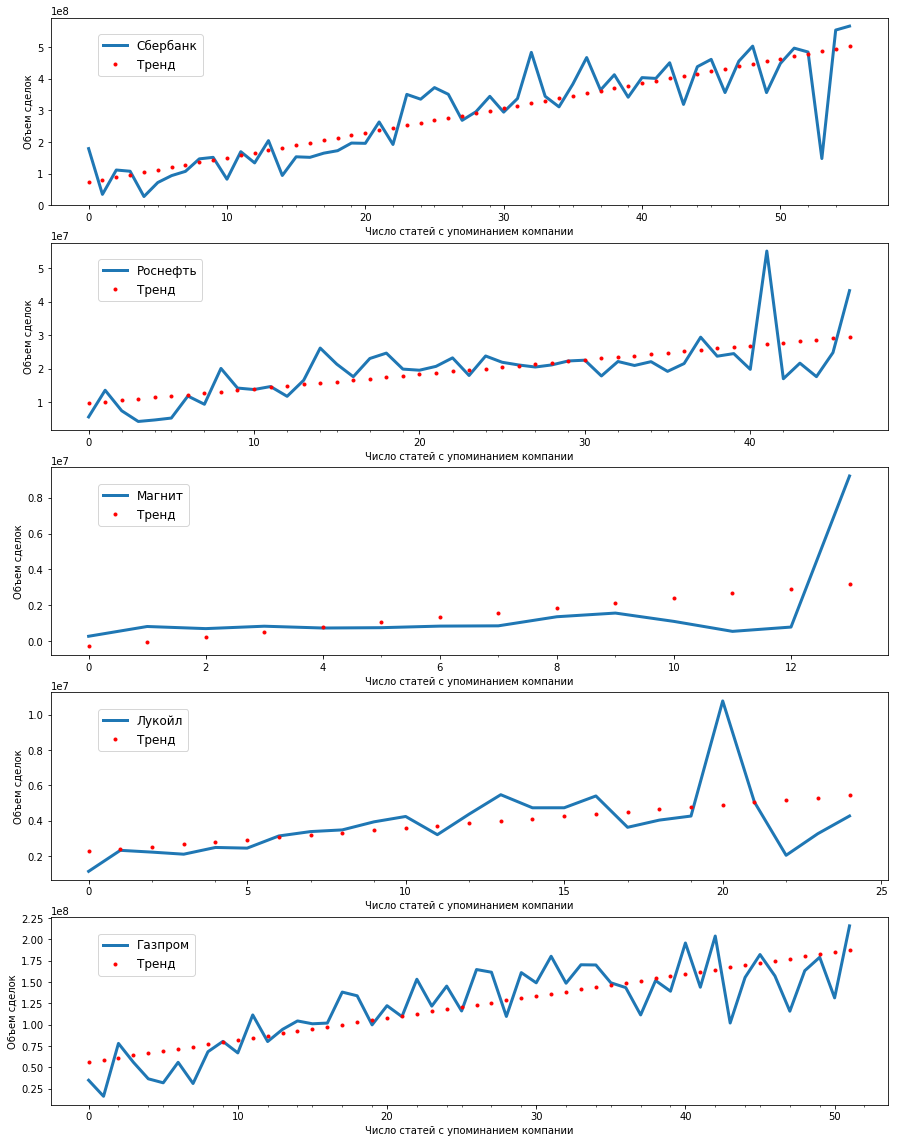

In [157]:

fig, axs = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(15, 20)

bar_width = 0.8
opacity = 1
weight = 3





for i in range(0,5):
    
    c = col[i]
    d = d_[c[0:4]][0]
    
    f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c[0:4] + '_vol'])

    
    f_ = f_.groupby(['week',c[0:4] + '_vol']).sum()['b'].reset_index()
    f_ = f_.groupby(['week']).sum().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    t = f_.groupby(['b']).mean().reset_index()
    
    
    index_ = t['b'].tolist()
    
    for x in index_:
        if x % 5 != 0:
            index_.remove(x)
        
    dates = index_
    ind = index_
    
    
    
    axs[i].plot( 
                            (t.reset_index()[c[0:4] + '_vol']), 
                             alpha = opacity, label=dict_labels[c[0:4]], linewidth = weight
                )
    
    
           

    #axs[i].set_title(d[c[0:4]])
    
    axs[i].set_xlabel('Число статей с упоминанием компании')
    axs[i].set_ylabel('Объем сделок')
    
    axs[i].set_xticks(ind, dates)
    #axs[i].tick_params(axis='y', fontsize=12)
    


    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(t.reset_index()['index'].values.reshape(len(t),1), t.reset_index()[c[0:4] + '_vol'].values.reshape(len(t),1))

    # Plot outputs
    axs[i].plot(t.reset_index()['index'].values.reshape(len(t),1), 
             regr.predict(t.reset_index()['index'].values.reshape(len(t),1)),
             color='red',linewidth=0, marker = '.', label = 'Тренд')
    
    axs[i].legend(loc='center left', bbox_to_anchor=(0.05, 0.8), ncol = 1, fontsize=12)

fig.savefig('res_1' + '.png')
plt.show()

In [130]:
    f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['week',c[0:4] + '_vol']).sum()['b'].reset_index()
    f_ = f_.groupby(['week']).sum().reset_index()

In [144]:
f_

,index,artical_subheader,article_header,authors,error,flag,rubric,source,step,time,url,date,month,len,len_1,text_clear,article_header_clear,artical_subheader_clear,len_2,text_clear_1,len_3,SBER_return_1_x,SBER_return_10_x,SBER_return_30_x,SBER_return_50_x,SBER_return_b_1_x,SBER_return_b_30_x,SBER_return_b_50_x,SBER_return_b_10_x,SBER_vol_x,SBER_abs_x,SBER_movement_1_x,SBER_movement_2_x,SBER_movement_3_x,SBER_movement_5_x,SBER_movement_x,LKOH_return_1_x,LKOH_return_10_x,LKOH_return_30_x,LKOH_return_50_x,LKOH_return_b_1_x,LKOH_return_b_30_x,LKOH_return_b_50_x,LKOH_return_b_10_x,LKOH_vol_x,LKOH_abs_x,LKOH_movement_1_x,LKOH_movement_2_x,LKOH_movement_3_x,LKOH_movement_5_x,LKOH_movement_x,MGNT_return_1_x,MGNT_return_10_x,MGNT_return_30_x,MGNT_return_50_x,MGNT_return_b_1_x,MGNT_return_b_30_x,MGNT_return_b_50_x,MGNT_return_b_10_x,MGNT_vol_x,MGNT_abs_x,MGNT_movement_1_x,MGNT_movement_2_x,MGNT_movement_3_x,MGNT_movement_5_x,MGNT_movement_x,GAZP_return_1_x,GAZP_return_10_x,GAZP_return_30_x,GAZP_return_50_x,GAZP_return_b_1_x,GAZP_return_b_30_x,GAZP_return_b_50_x,GAZP_return_b_10_x,GAZP_vol_x,GAZP_abs_x,GAZP_movement_1_x,GAZP_movement_2_x,GAZP_movement_3_x,GAZP_movement_5_x,GAZP_movement_x,ROSN_return_1_x,ROSN_return_10_x,ROSN_return_30_x,ROSN_return_50_x,ROSN_return_b_1_x,ROSN_return_b_30_x,ROSN_return_b_50_x,ROSN_return_b_10_x,ROSN_vol_x,ROSN_abs_x,ROSN_movement_1_x,ROSN_movement_2_x,ROSN_movement_3_x,ROSN_movement_5_x,ROSN_movement_x,SBER_r_1_x,SBER_r_10_x,SBER_r_30_x,SBER_r_50_x,SBER_r_b_1_x,SBER_r_b_10_x,SBER_r_b_30_x,SBER_r_b_50_x,LKOH_r_1_x,LKOH_r_10_x,LKOH_r_30_x,LKOH_r_50_x,LKOH_r_b_1_x,LKOH_r_b_10_x,LKOH_r_b_30_x,LKOH_r_b_50_x,MGNT_r_1_x,MGNT_r_10_x,MGNT_r_30_x,MGNT_r_50_x,MGNT_r_b_1_x,MGNT_r_b_10_x,MGNT_r_b_30_x,MGNT_r_b_50_x,GAZP_r_1_x,GAZP_r_10_x,GAZP_r_30_x,GAZP_r_50_x,GAZP_r_b_1_x,GAZP_r_b_10_x,GAZP_r_b_30_x,GAZP_r_b_50_x,ROSN_r_1_x,ROSN_r_10_x,ROSN_r_30_x,ROSN_r_50_x,ROSN_r_b_1_x,ROSN_r_b_10_x,ROSN_r_b_30_x,ROSN_r_b_50_x,week,b,SBER_return_1_y,SBER_return_10_y,SBER_return_30_y,SBER_return_50_y,SBER_return_b_1_y,SBER_return_b_30_y,SBER_return_b_50_y,SBER_return_b_10_y,SBER_vol_y,SBER_abs_y,SBER_movement_1_y,SBER_movement_2_y,SBER_movement_3_y,SBER_movement_5_y,SBER_movement_y,LKOH_return_1_y,LKOH_return_10_y,LKOH_return_30_y,LKOH_return_50_y,LKOH_return_b_1_y,LKOH_return_b_30_y,LKOH_return_b_50_y,LKOH_return_b_10_y,LKOH_vol_y,LKOH_abs_y,LKOH_movement_1_y,LKOH_movement_2_y,LKOH_movement_3_y,LKOH_movement_5_y,LKOH_movement_y,MGNT_return_1_y,MGNT_return_10_y,MGNT_return_30_y,MGNT_return_50_y,MGNT_return_b_1_y,MGNT_return_b_30_y,MGNT_return_b_50_y,MGNT_return_b_10_y,MGNT_vol_y,MGNT_abs_y,MGNT_movement_1_y,MGNT_movement_2_y,MGNT_movement_3_y,MGNT_movement_5_y,MGNT_movement_y,GAZP_return_1_y,GAZP_return_10_y,GAZP_return_30_y,GAZP_return_50_y,GAZP_return_b_1_y,GAZP_return_b_30_y,GAZP_return_b_50_y,GAZP_return_b_10_y,GAZP_vol_y,GAZP_abs_y,GAZP_movement_1_y,GAZP_movement_2_y,GAZP_movement_3_y,GAZP_movement_5_y,GAZP_movement_y,ROSN_return_1_y,ROSN_return_10_y,ROSN_return_30_y,ROSN_return_50_y,ROSN_return_b_1_y,ROSN_return_b_30_y,ROSN_return_b_50_y,ROSN_return_b_10_y,ROSN_vol_y,ROSN_abs_y,ROSN_movement_1_y,ROSN_movement_2_y,ROSN_movement_3_y,ROSN_movement_5_y,ROSN_movement_y,SBER_r_1_y,SBER_r_10_y,SBER_r_30_y,SBER_r_50_y,SBER_r_b_1_y,SBER_r_b_10_y,SBER_r_b_30_y,SBER_r_b_50_y,LKOH_r_1_y,LKOH_r_10_y,LKOH_r_30_y,LKOH_r_50_y,LKOH_r_b_1_y,LKOH_r_b_10_y,LKOH_r_b_30_y,LKOH_r_b_50_y,MGNT_r_1_y,MGNT_r_10_y,MGNT_r_30_y,MGNT_r_50_y,MGNT_r_b_1_y,MGNT_r_b_10_y,MGNT_r_b_30_y,MGNT_r_b_50_y,GAZP_r_1_y,GAZP_r_10_y,GAZP_r_30_y,GAZP_r_50_y,GAZP_r_b_1_y,GAZP_r_b_10_y,GAZP_r_b_30_y,GAZP_r_b_50_y,ROSN_r_1_y,ROSN_r_10_y,ROSN_r_30_y,ROSN_r_50_y,ROSN_r_b_1_y,ROSN_r_b_10_y,ROSN_r_b_30_y,ROSN_r_b_50_y
0,0,"Как отмечает Bloomberg, дальнейшее падение...",Мировые цены на нефть упали ниже $53,NaN,NaN,NaN,NaN,vedomosti,2015/01/05,398.382,https://www.vedomosti.ru/finance/articles/2015...,20150105,201501.0,227.0,227,миров цен нефт упа ниж сообща дан мск стоимост...,ми

In [125]:
t

,b,week,SBER_vol
0,0,2.880712e+06,3.153023e+08


In [87]:
regr.fit(t.reset_index()['index'].values.reshape(len(t),1), t.reset_index()[c[0:4] + '_vol'].values.reshape(len(t),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
len(t.reset_index()[c[0:4] + '_vol'])

52

In [85]:
len(t.reset_index()['index'].values)

52

In [110]:
axs[i].set_xticks(ind, dates)

In [42]:
t = f_.groupby(['b']).mean().reset_index()

In [43]:
scipy.stats.pearsonr(t['b'], t[c[0:4] + '_vol'])

(0.8146234851120988, 2.0240381861914523e-13)

SBER_r_1 (0.5302679994504883, 1.0253447500840774e-17)
ROSN_r_1 (0.47010415187554555, 9.017884580136208e-14)
MGNT_r_1 (0.5594796993163295, 5.96562065091421e-18)
LKOH_r_1 (0.5578163115877819, 1.796843185492038e-19)
GAZP_r_1 (0.6169548759026552, 6.9363524410977595e-25)


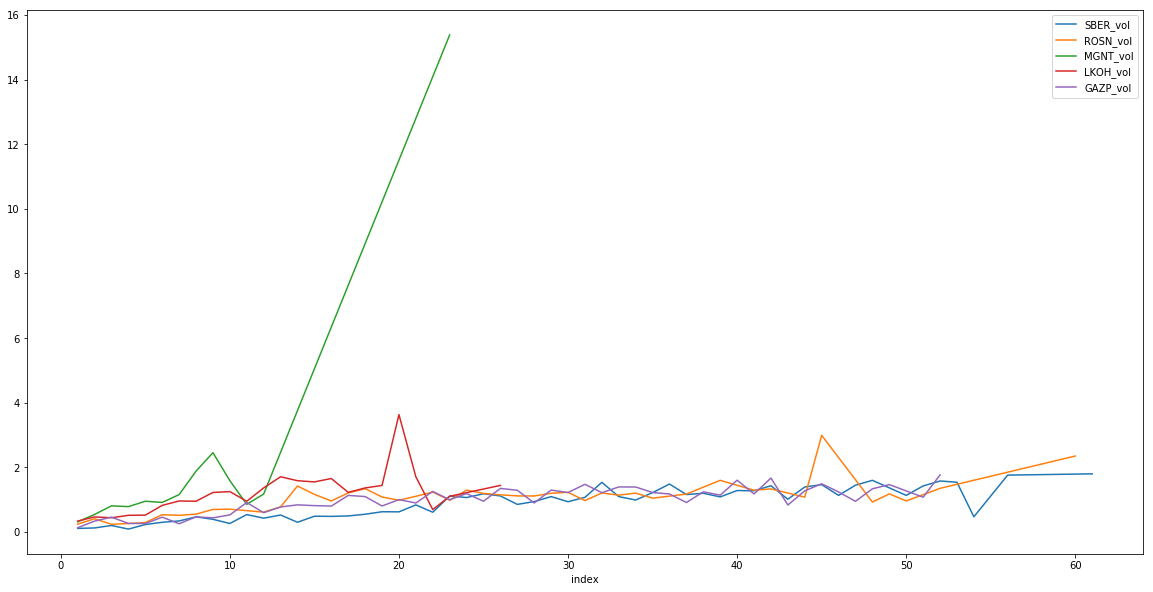

In [33]:
# только текст
res = pd.DataFrame()

for c in col:
    #c = col[4]

    #for d in d_[c[0:4]][0]:
    d = d_[c[0:4]][0]


    f['b'] = f['text_clear'].fillna('').apply(find)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['b', 'week',c[0:4] + '_vol'])['index'].count().reset_index()
    f_ = f_.groupby(['b', 'week']).sum().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    (f_.groupby(['index']).mean()[c[0:4] + '_vol'] / f_[c[0:4] + '_vol'].mean()).plot(figsize = (20,10), legend = True
                                                                                    
                                                                                     )
    
    print(c, scipy.stats.pearsonr(f_['index'], f_[c[0:4] + '_vol']))


# H2 абсолютное движение

In [46]:
d = d_[col[0][0:4]][0]

f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
#f_ = f[f['b']].reset_index(drop = False)
f_ = f.reset_index(drop = False)
f_ = f_.dropna(subset = [c])

In [47]:
f_.groupby(['date',c[0:4] + '_abs']).sum()['b'].reset_index()

,date,GAZP_abs,b
0,20150105.0,0.033565,0
1,20150106.0,0.044590,0
2,20150108.0,0.045695,0
3,20150109.0,0.032500,0
4,20150112.0,0.008135,5
5,20150113.0,0.017404,7
6,20150114.0,0.030354,13
7,20150115.0,0.003457,13
8,20150116.0,0.024728,6
9,20150119.0,0.009894,10


SBER_r_1 (0.4101217932010004, 1.1605829561344186e-10)
ROSN_r_1 (0.3459842764833429, 8.228094975845827e-08)
MGNT_r_1 (0.451059397317318, 7.939606744920388e-13)
LKOH_r_1 (0.26989255689173386, 3.631008891724185e-05)
GAZP_r_1 (0.3990811120879578, 3.98334395987046e-10)


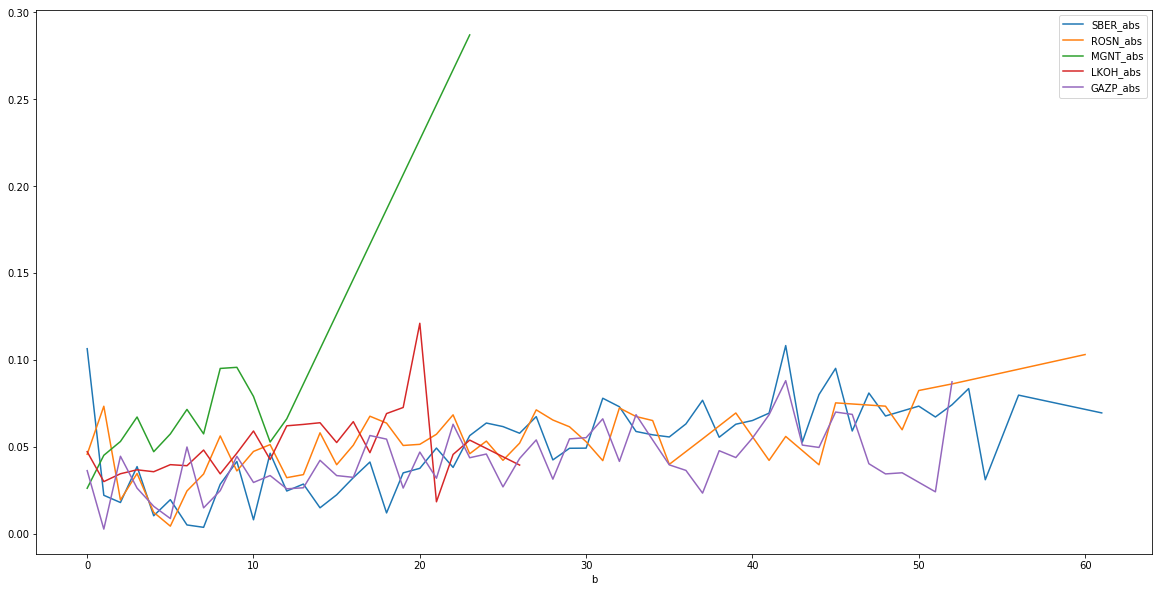

In [162]:
# только текст
res = pd.DataFrame()

for c in col:
    #c = col[4]

    #for d in d_[c[0:4]][0]:
    d = d_[c[0:4]][0]


    f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['week',c[0:4] + '_abs']).sum()['b'].reset_index()
    f_ = f_.groupby(['week']).sum().reset_index()
    
    #f_ = f_.groupby(['b', 'date',c[0:4] + '_abs'])['index'].count().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    #f_ = f_[f_['index'] != f_['index'].max()]
    f_.groupby(['b']).mean()[c[0:4] + '_abs'].plot(figsize = (20,10), legend = True)
    
    print(c, scipy.stats.pearsonr(f_['b'], f_[c[0:4] + '_abs']))



In [164]:
f_.groupby(['b']).mean()

,week,GAZP_abs
b,,
0,2.880751e+06,0.036304
1,2.882928e+06,0.002684
2,2.881443e+06,0.044578
3,2.882968e+06,0.026233
4,2.880810e+06,0.015779
5,2.881567e+06,0.008763
6,2.878647e+06,0.049897
7,2.879663e+06,0.014895
8,2.881945e+06,0.024800


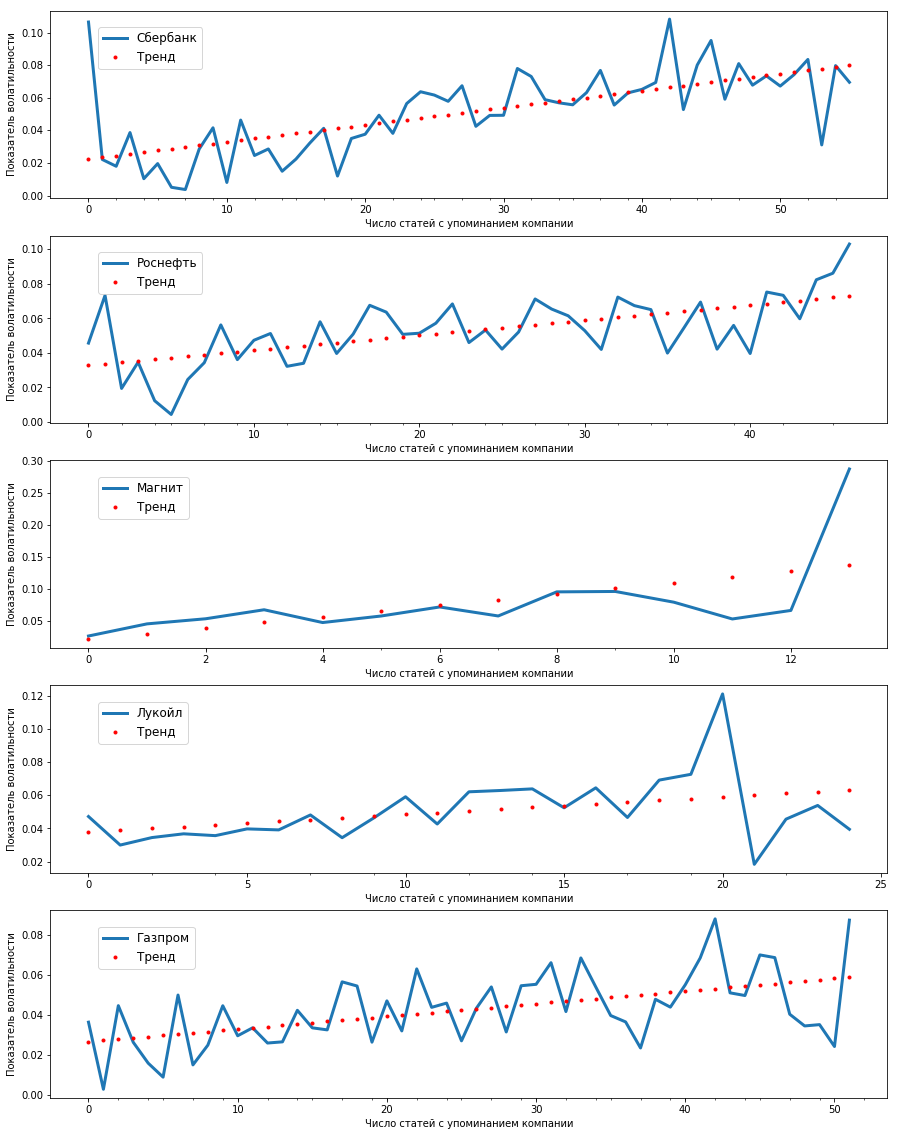

In [166]:

fig, axs = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(15, 20)

bar_width = 0.8
opacity = 1
weight = 3





for i in range(0,5):
    
    c = col[i]
    d = d_[c[0:4]][0]
    
    f['b'] = f['text_clear'].fillna('').apply(find).astype(int)
    #f_ = f[f['b']].reset_index(drop = False)
    f_ = f.reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['week',c[0:4] + '_abs']).sum()['b'].reset_index()
    f_ = f_.groupby(['week']).sum().reset_index()
    
    t = f_.groupby(['b']).mean().reset_index()
    
    
    index_ = t['b'].tolist()
    
    for x in index_:
        if x % 5 != 0:
            index_.remove(x)
        
    dates = index_
    ind = index_
    
    
    
    axs[i].plot( 
                            (t.reset_index()[c[0:4] + '_abs']), 
                             alpha = opacity, label=dict_labels[c[0:4]], linewidth = weight
                )
    
    
           

    #axs[i].set_title(d[c[0:4]])
    
    axs[i].set_xlabel('Число статей с упоминанием компании')
    axs[i].set_ylabel('Показатель волатильности')
    
    axs[i].set_xticks(ind, dates)
    #axs[i].tick_params(axis='y', fontsize=12)
    


    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(t.reset_index()['index'].values.reshape(len(t),1), t.reset_index()[c[0:4] + '_abs'].values.reshape(len(t),1))

    # Plot outputs
    axs[i].plot(t.reset_index()['index'].values.reshape(len(t),1), 
             regr.predict(t.reset_index()['index'].values.reshape(len(t),1)),
             color='red',linewidth=0, marker = '.', label = 'Тренд')
    
    axs[i].legend(loc='center left', bbox_to_anchor=(0.05, 0.8), ncol = 1, fontsize=12)

#fig.savefig('res_1' + '.png')
plt.show()

In [161]:
t

,week,GAZP_abs,b
0,2878586.0,0.123849,0
1,2878587.0,0.091850,29
2,2878588.0,0.081461,30
3,2878589.0,0.098363,41
4,2878590.0,0.011954,4
5,2878600.0,0.127133,33
6,2878601.0,0.081344,24
7,2878602.0,0.068668,32
8,2878603.0,0.043785,29
9,2878614.0,0.073500,18


SBER_r_1 (0.5007712519244093, 1.1003823707687504e-15)
ROSN_r_1 (0.40925011003090067, 1.6977377996783398e-10)
MGNT_r_1 (0.5778888361501566, 2.6575890136474985e-19)
LKOH_r_1 (0.46611360787121264, 2.5522305636752184e-13)
GAZP_r_1 (0.4594793403920588, 4.238174944429319e-13)


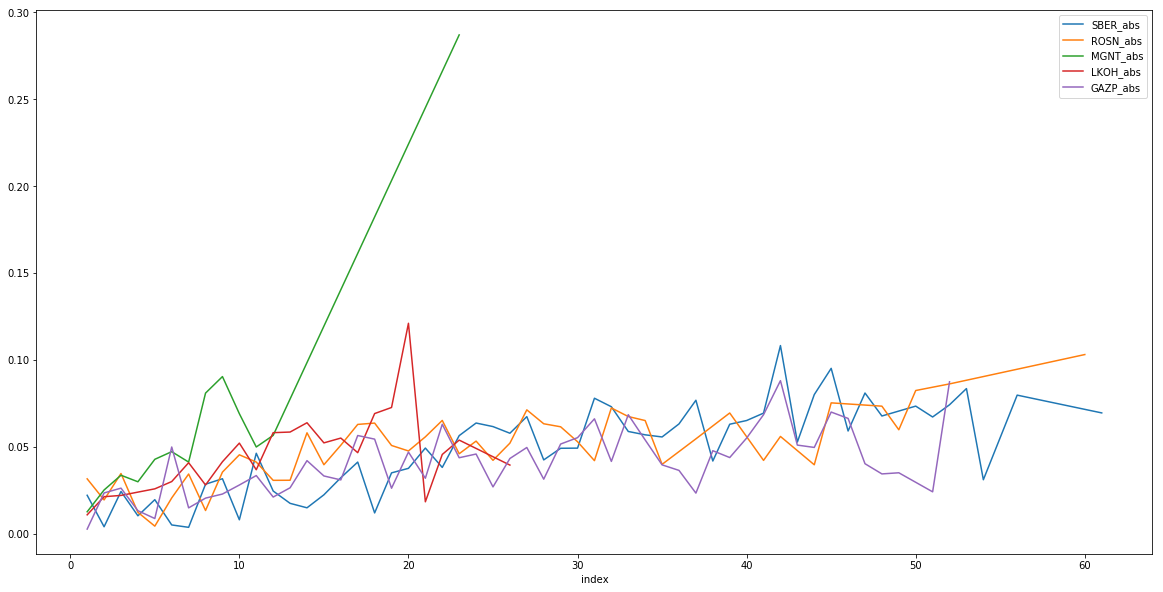

In [11]:
# только текст
res = pd.DataFrame()

for c in col:
    #c = col[4]

    #for d in d_[c[0:4]][0]:
    d = d_[c[0:4]][0]


    f['b'] = f['text_clear'].fillna('').apply(find)
    f_ = f[f['b']].reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['b', 'week',c[0:4] + '_abs'])['index'].count().reset_index()
    f_ = f_.groupby(['b', 'week']).sum().reset_index()
    
    #f_ = f_.groupby(['b', 'date',c[0:4] + '_abs'])['index'].count().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    #f_ = f_[f_['index'] != f_['index'].max()]
    f_.groupby(['index']).mean()[c[0:4] + '_abs'].plot(figsize = (20,10), legend = True)
    
    print(c, scipy.stats.pearsonr(f_['index'], f_[c[0:4] + '_abs']))



In [346]:
f

,artical_subheader,article_header,authors,error,flag,rubric,source,step,time,url,text_clear,article_header_clear,artical_subheader_clear,date,SBER_return_1,SBER_return_10,SBER_return_30,SBER_return_50,SBER_return_b_1,SBER_return_b_30,SBER_return_b_50,SBER_return_b_10,SBER_vol,SBER_abs,SBER_movement_1,SBER_movement_2,SBER_movement_3,SBER_movement_5,LKOH_return_1,LKOH_return_10,LKOH_return_30,LKOH_return_50,LKOH_return_b_1,LKOH_return_b_30,LKOH_return_b_50,LKOH_return_b_10,LKOH_vol,LKOH_abs,LKOH_movement_1,LKOH_movement_2,LKOH_movement_3,LKOH_movement_5,MTSS_return_1,MTSS_return_10,MTSS_return_30,MTSS_return_50,MTSS_return_b_1,MTSS_return_b_30,MTSS_return_b_50,MTSS_return_b_10,MTSS_vol,MTSS_abs,MTSS_movement_1,MTSS_movement_2,MTSS_movement_3,MTSS_movement_5,GAZP_return_1,GAZP_return_10,GAZP_return_30,GAZP_return_50,GAZP_return_b_1,GAZP_return_b_30,GAZP_return_b_50,GAZP_return_b_10,GAZP_vol,GAZP_abs,GAZP_movement_1,GAZP_movement_2,GAZP_movement_3,GAZP_movement_5,ROSN_return_1,ROSN_return_10,ROSN_return_30,ROSN_return_50,ROSN_return_b_1,ROSN_return_b_30,ROSN_return_b_50,ROSN_return_b_10,ROSN_vol,ROSN_abs,ROSN_movement_1,ROSN_movement_2,ROSN_movement_3,ROSN_movement_5,SBER_r_1,SBER_r_10,SBER_r_30,SBER_r_50,SBER_r_b_1,SBER_r_b_10,SBER_r_b_30,SBER_r_b_50,LKOH_r_1,LKOH_r_10,LKOH_r_30,LKOH_r_50,LKOH_r_b_1,LKOH_r_b_10,LKOH_r_b_30,LKOH_r_b_50,MTSS_r_1,MTSS_r_10,MTSS_r_30,MTSS_r_50,MTSS_r_b_1,MTSS_r_b_10,MTSS_r_b_30,MTSS_r_b_50,GAZP_r_1,GAZP_r_10,GAZP_r_30,GAZP_r_50,GAZP_r_b_1,GAZP_r_b_10,GAZP_r_b_30,GAZP_r_b_50,ROSN_r_1,ROSN_r_10,ROSN_r_30,ROSN_r_50,ROSN_r_b_1,ROSN_r_b_10,ROSN_r_b_30,ROSN_r_b_50,week,b
0,NaN,Если завтра BB,NaN,NaN,NaN,NaN,rbc,2015/01/12,168.8106920719147,https://www.rbc.ru/newspaper/2015/01/12/56bd45...,недел международн рейтингов агентств планир пе...,завтр,NaN,20150112.0,0.042945,0.039841,-0.146540,-0.029321,-0.01,-0.025,0.05,0.1,99348150,0.010929,0,0,0,0,-0.017843,-0.135397,-0.174608,-0.081674,0.01,0.025,0.05,0.1,909067,0.006911,0,0,0,0,-0.056235,-0.099183,-0.228925,-0.226918,0.01,0.025,0.05,0.1,2718270,0.003640,0,0,0,0,-0.016966,-0.052568,-0.095296,0.039437,0.01,0.025,0.05,0.1,25286750,0.008135,0,0,0,0,-0.004392,-0.140148,-0.240648,-0.159456,0.01,0.025,0.05,0.1,3140710,0.009709,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,2878587.0,True
1,NaN,Пол-литра с госскидкой,NaN,NaN,NaN,NaN,rbc,2015/01/12,168.8133871555328,https://www.rbc.ru/newspaper/2015/01/12/56bd46...,феврал росалкогол регулирован устанавлива нов ...,пол литр госскидк,NaN,20150112.0,0.042945,0.039841,-0.146540,-0.029321,-0.01,-0.025,0.05,0.1,99348150,0.010929,0,0,0,0,-0.017843,-0.135397,-0.174608,-0.081674,0.01,0.025,0.05,0.1,909067,0.006911,0,0,0,0,-0.056235,-0.099183,-0.228925,-0.226918,0.01,0.025,0.05,0.1,2718270,0.003640,0,0,0,0,-0.016966,-0.052568,-0.095296,0.039437,0.01,0.025,0.05,0.1,25286750,0.008135,0,0,0,0,-0.004392,-0.140148,-0.240648,-0.159456,0.01,0.025,0.05,0.1,3140710,0.009709,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,2878587.0,True
2,NaN,Марш единства и разногласия,NaN,NaN,NaN,NaN,rbc,2015/01/12,168.8151071071625,https://www.rbc.ru/newspaper/2015/01/12/56bd45...,воскресен париж прошел марш единств памя жертв...,марш единств разноглас,NaN,20150112.0,0.042945,0.039841,-0.146540,-0.029321,-0.01,-0.025,0.05,0.1,99348150,0.010929,0,0,0,0,-0.017843,-0.135397,-0.174608,-0.081674,0.01,0.025,0.05,0.1,909067,0.006911,0,0,0,0,-0.056235,-0.099183,-0.228925,-0.226918,0.01,0.025,0.05,0.1,2718270,0.003640,0,0,0,0,-0.016966,-0.052568,-0.095296,0.039437,0.01,0.025,0.05,0.1,25286750,0.008135,0,0,0,0,-0.004392,-0.140148,-0.240648,-0.159456,0.01,0.025,0.05,0.1,3140710,0.009709,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,2878587.0,True
3,NaN,«Главная проблема – полное отсутствие доверия ...,NaN,NaN,NaN,NaN,rbc,2015/01/12,168.8171520233154,https://www.rbc.ru/newspaper/2015/01/12/56bd45...,объявлен антикризисн мер власт усугуб пробл

# H3 направление в день новости

SBER_r_1 (0.07798931155027634, 0.01724964689439598)
ROSN_r_1 (0.04594343782829405, 0.16565819061926343)
MGNT_r_1 (0.013862724284188211, 0.7429711908000487)
LKOH_r_1 (0.016959350000672103, 0.6386651820994735)
GAZP_r_1 (0.06375729132083903, 0.053342407351901586)


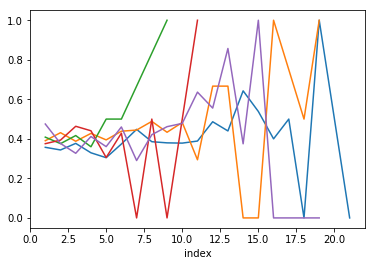

In [12]:
# только текст
res = pd.DataFrame()

for c in col:
    #c = col[4]

    #for d in d_[c[0:4]][0]:
    d = d_[c[0:4]][0]


    f['b'] = f['text_clear'].fillna('').apply(find)
    f_ = f[f['b']].reset_index(drop = False)
    f_ = f_.dropna(subset = [c])

    
    f_ = f_.groupby(['b', 'date',c[0:4] + '_movement'])['index'].count().reset_index()

    
    #f_ = f_.groupby(['b', 'date',c[0:4] + '_abs'])['index'].count().reset_index()
    #f_['index'] = (f_['index'] / 5).round()
    #f_ = f_[f_['index'] != f_['index'].max()]
    f_.groupby(['index']).mean()[c[0:4] + '_movement'].plot()
    
    print(c, scipy.stats.pearsonr(f_['index'], f_[c[0:4] + '_movement']))





In [18]:
from xgboost import XGBClassifier

In [19]:
# только текст
res = pd.DataFrame()
min_df_ = [25,50]

for c_ in ['', '_1', '_2', '_3', '_5']:
    
    for c in [x[0:4] + '_movement' + c_ for x in col]:
        print(c)
        for d in d_[c[0:4]][0]:

            f['b'] = f['text_clear'].fillna('').apply(find)
            f_ = f[f['b']].reset_index(drop = False)
            f_ = f_.dropna(subset = [c])

            X_tr_d = f_['date'].drop_duplicates().sample(round(len(f_['date'].drop_duplicates())*0.5), random_state=2)
            X_tr = f_[f_['date'].isin(X_tr_d.tolist())]
            X_te = f_[~f_['date'].isin(X_tr_d.tolist())]

            X_tr = clear_dataframe(X_tr)
            X_te = clear_dataframe(X_te)

            y_train = X_tr[c]
            y_test = X_te[c]

            X_train = X_tr['text_clear']
            X_test  = X_te['text_clear']


            for m_df in (min_df_):

                for scoring in ['recall']:

                    for kernel in ['linear']:

                        vectorizer = TfidfVectorizer(min_df=m_df)
                        vectorizer.fit_transform(X_train)
                        X_train_ = vectorizer.transform(X_train)

                                  
                        
 
                        model = XGBClassifier()
                        model.fit(X_train_, y_train)
                        

                        y_1 = model.predict(X_train_).round()
                        y_2 = model.predict(vectorizer.transform(X_test)).round()

                        X_tr['predict'] = y_1
                        X_te['predict'] = y_2

                        c_ = c.replace('_r_', "_return_")

                        train_model = sum(X_tr[X_tr['predict'] == 1][c_])
                        train_all = sum(X_tr[c_])

                        test_model = sum(X_te[X_te['predict'] == 1][c_])
                        test_all = sum(X_te[c_])


                        r = {'train_accuracy':sklearn.metrics.accuracy_score(y_train, y_1), 'test_accuracy':sklearn.metrics.accuracy_score(y_test, y_2),
                             'train_recall':sklearn.metrics.recall_score(y_train, y_1), 'test_recall':sklearn.metrics.recall_score(y_test, y_2),
                             'min_df':m_df, 'col':c, 'profit_train_model':train_model, 'profit_train_all':train_all, 
                             'profit_test_model':test_model, 'profit_test_all':test_all, 'words':X_train_.shape[1], 
                             'd':' '.join(d), 'scoring':scoring}


                        res = res.append(pd.DataFrame(r, index = [len(res)]))

            print('')

        #res.to_excel('res_col_1.xlsx')
        break
    

SBER_movement

SBER_movement_1

SBER_movement_2

SBER_movement_3

SBER_movement_5



In [20]:
res

,train_accuracy,test_accuracy,train_recall,test_recall,min_df,col,profit_train_model,profit_train_all,profit_test_model,profit_test_all,words,d,scoring
0,0.997872,0.560510,0.994475,0.186170,25,SBER_movement,180,181,35,188,1611,с б е р б а н к,recall
1,1.000000,0.549894,1.000000,0.207447,50,SBER_movement,181,181,39,188,848,с б е р б а н к,recall
2,0.997872,0.505308,1.000000,0.539095,25,SBER_movement_1,242,242,131,243,1611,с б е р б а н к,recall
3,1.000000,0.503185,1.000000,0.514403,50,SBER_movement_1,242,242,125,243,848,с б е р б а н к,recall
4,0.995745,0.749469,0.979381,0.017094,25,SBER_movement_2,95,97,2,117,1611,с б е р б а н к,recall
5,0.995745,0.736730,0.979381,0.017094,50,SBER_movement_2,95,97,2,117,848,с б е р б а н к,recall
6,1.000000,0.895966,1.000000,0.000000,25,SBER_movement_3,42,42,0,48,1611,с б е р б а н к,recall
7,1.000000,0.895966,1.000000,0.000000,50,SBER_movement_3,42,42,0,48,848,с б е р б а н к,recall
8,1.000000,0.985138,1.000000,0.000000,25,SBER_movement_5,8,8,0,7,1611,с б е р б а н к,recall
9,1.000000,0.985138,1.000000,0.000000,50,SBER_movement_5,8,8,0,7,848,с б е р б а н к,recall


In [11]:
# только текст
res = pd.DataFrame()
min_df_ = [25,50]

for c_ in ['', '_1', '_2', '_3', '_5']:
    
    for c in [x[0:4] + '_movement' + c_ for x in col]:
        print(c)
        for d in d_[c[0:4]][0]:

            f['b'] = f['text_clear'].fillna('').apply(find)
            f_ = f[f['b']].reset_index(drop = False)
            f_ = f_.dropna(subset = [c])

            X_tr_d = f_['date'].drop_duplicates().sample(round(len(f_['date'].drop_duplicates())*0.5), random_state=2)
            X_tr = f_[f_['date'].isin(X_tr_d.tolist())]
            X_te = f_[~f_['date'].isin(X_tr_d.tolist())]

            X_tr = clear_dataframe(X_tr)
            X_te = clear_dataframe(X_te)

            y_train = X_tr[c]
            y_test = X_te[c]

            X_train = X_tr['text_clear']
            X_test  = X_te['text_clear']


            for m_df in (min_df_):

                for scoring in ['recall']:

                    for kernel in ['linear']:

                        vectorizer = TfidfVectorizer(min_df=m_df)
                        vectorizer.fit_transform(X_train)
                        X_train_ = vectorizer.transform(X_train)

                                  
                        
 
                        model = XGBClassifier()
                        model.fit(X_train_, y_train)
                        

                        y_1 = model.predict(X_train_).round()
                        y_2 = model.predict(vectorizer.transform(X_test)).round()

                        X_tr['predict'] = y_1
                        X_te['predict'] = y_2

                        c_ = c.replace('_r_', "_return_")

                        train_model = sum(X_tr[X_tr['predict'] == 1][c_])
                        train_all = sum(X_tr[c_])

                        test_model = sum(X_te[X_te['predict'] == 1][c_])
                        test_all = sum(X_te[c_])


                        r = {'train_accuracy':sklearn.metrics.accuracy_score(y_train, y_1), 'test_accuracy':sklearn.metrics.accuracy_score(y_test, y_2),
                             'train_recall':sklearn.metrics.recall_score(y_train, y_1), 'test_recall':sklearn.metrics.recall_score(y_test, y_2),
                             'min_df':m_df, 'col':c, 'profit_train_model':train_model, 'profit_train_all':train_all, 
                             'profit_test_model':test_model, 'profit_test_all':test_all, 'words':X_train_.shape[1], 
                             'd':' '.join(d), 'scoring':scoring}


                        res = res.append(pd.DataFrame(r, index = [len(res)]))

            print('')

        #res.to_excel('res_col_1.xlsx')
        break
    

<470x1611 sparse matrix of type '<class 'numpy.float64'>'
	with 119012 stored elements in Compressed Sparse Row format>

In [285]:
                    score = 0
                    C = gs.best_params_['C']
                    


                    model = SVC(kernel=kernel, C=C)
                    model.fit(X_train_, y_train, )


                    y_1 = model.predict(X_train_).round()
                    y_2 = model.predict(vectorizer.transform(X_test)).round()

In [335]:
pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame(y_2)], axis = 1)

,index,ROSN_movement,0
0,0,0,1
1,1136,1,1
2,2797,1,0
3,2973,0,0
4,3536,0,0
5,4122,0,1
6,4484,1,1
7,5495,1,1
8,5833,1,0
9,5952,0,1


In [253]:
y_2.std()

0.0071152760528983856

In [250]:
y_test.head(10)

696     0.003410
986     0.028160
2341    0.000000
3188    0.017562
4246    0.002509
4353   -0.040345
5152   -0.028880
5833    0.009231
6405   -0.001905
6527    0.032992
Name: SBER_movement, dtype: float64

In [34]:
res

""


In [184]:
clf.predict(X_train_).std()

0.0121823546170149

In [238]:
y_train.std()

0.01819066985918775